
<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://databricks.com/wp-content/uploads/2018/03/db-academy-rgb-1200px.png" alt="Databricks Learning">
</div>



# Supervised Learning

In this demo, we will guide you through using a supervised learning model. In particular, we will be working through how to train a regression model. In these demos, you will learn how to retrieve data and fit the model using Databricks Notebooks and track the model's development using MLflow. In addition, you will learn how to interpret results using visualization tools and various model metrics. 

**Learning Objectives:**

*By the end of this demo, you will be able to:*

* Fit a linear regression model on modeling data using the sklearn API.

* Interpret the fit of an sklearn linear model’s coefficients and intercept.

* Fit a decision tree model using sklearn API and training data.

* Visualize an sklearn tree’s split points.

* Identify which metrics are tracked by MLflow.



## REQUIRED - SELECT CLASSIC COMPUTE
Before executing cells in this notebook, please select your classic compute cluster in the lab. Be aware that **Serverless** is enabled by default.
Follow these steps to select the classic compute cluster:
1. Navigate to the top-right of this notebook and click the drop-down menu to select your cluster. By default, the notebook will use **Serverless**.
1. If your cluster is available, select it and continue to the next cell. If the cluster is not shown:
   - In the drop-down, select **More**.
   - In the **Attach to an existing compute resource** pop-up, select the first drop-down. You will see a unique cluster name in that drop-down. Please select that cluster.
  
**NOTE:** If your cluster has terminated, you might need to restart it in order to select it. To do this:
1. Right-click on **Compute** in the left navigation pane and select *Open in new tab*.
1. Find the triangle icon to the right of your compute cluster name and click it.
1. Wait a few minutes for the cluster to start.
1. Once the cluster is running, complete the steps above to select your cluster.

## Requirements

Please review the following requirements before starting the lesson:

* To run this notebook, you need to use one of the following Databricks runtime(s): **16.3.x-cpu-ml-scala2.12**


## Classroom Setup

Before starting the demo, run the provided classroom setup script. This script will define configuration variables necessary for the demo. Execute the following cell:

In [0]:
%run ../Includes/Classroom-Setup-1.1a

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/569.1 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━ 235.5/569.1 kB 6.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 563.2/569.1 kB 8.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.1/569.1 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: databricks-sdk
    Found existing installation: databricks-sdk 0.30.0
    Not uninstalling databricks-sdk at /databricks/python3/lib/python3.12/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-e7e3071a-31e2-4ba6-9c1f-58b9565a5693
    Can't uninstall 'databricks-sdk'. No files were found to uninstall.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


2025/08/07 02:12:12 INFO databricks.ml_features._compute_client._compute_client: Setting columns ['unique_id'] of table 'dbacademy.labuser11091541_1754532261.ca_housing' to NOT NULL.
2025/08/07 02:12:16 INFO databricks.ml_features._compute_client._compute_client: Setting Primary Keys constraint ['unique_id'] on table 'dbacademy.labuser11091541_1754532261.ca_housing'.
2025/08/07 02:12:24 INFO databricks.ml_features._compute_client._compute_client: Created feature table 'dbacademy.labuser11091541_1754532261.ca_housing'.


**Other Conventions:**

Throughout this demo, we'll refer to the object `DA`. This object, provided by Databricks Academy, contains variables such as your username, catalog name, schema name, working directory, and dataset locations. Run the code block below to view these details:

In [0]:
print(f"Username:          {DA.username}")
print(f"Catalog Name:      {DA.catalog_name}")
print(f"Schema Name:       {DA.schema_name}")
print(f"Working Directory: {DA.paths.working_dir}")
print(f"Dataset Location:  {DA.paths.datasets}")

Username:          labuser11091541_1754532261@vocareum.com
Catalog Name:      dbacademy
Schema Name:       labuser11091541_1754532261
Working Directory: /Volumes/dbacademy/ops/labuser11091541_1754532261@vocareum_com
Dataset Location:  NestedNamespace (california_housing='/Volumes/dbacademy_california_housing/v02', cdc_diabetes='/Volumes/dbacademy_cdc_diabetes/v01', telco='/Volumes/dbacademy_telco/v01', banking='/Volumes/dbacademy_banking/v01')


## Prepare Dataset

In this section, we are going to prepare the dataset for our machine learning models. The dataset we'll be working with is the **California housing dataset**. 

The dataset has been loaded, cleaned and saved to a **feature table**. We will read data directly from this table.

Then, we will split the dataset into **train and test** sets.

### Load Dataset

This dataset contains information about housing districts in California and **aims to predict the median house value** for California districts, based on various features.

While data cleaning and feature engineering is out of the scope of this demo, we will only map the `ocean_proximity` field. 


In [0]:
from databricks.feature_engineering import FeatureEngineeringClient
fe = FeatureEngineeringClient()

# read data from the feature store
table_name = f"{DA.catalog_name}.{DA.schema_name}.ca_housing"
feature_data_pd = fe.read_table(name=table_name).toPandas()
display(feature_data_pd.head(10))
feature_data_pd = feature_data_pd.drop(columns=['unique_id'])
display(feature_data_pd.head(10))

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,unique_id
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4
-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,5
-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,6
-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY,7
-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,8
-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,9


longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY
-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [0]:
unique_ocean_proximity = feature_data_pd['ocean_proximity'].unique()
print(unique_ocean_proximity)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [0]:
ocean_proximity_mapping = {
    'NEAR BAY': 1,
    '<1H OCEAN': 2,
    'INLAND': 3,
    'NEAR OCEAN': 4,
    'ISLAND': 5  
}

# Replace values in the DataFrame
feature_data_pd['ocean_proximity'] = feature_data_pd['ocean_proximity'].replace(ocean_proximity_mapping).astype(float)

# Print the updated DataFrame
feature_data_pd = feature_data_pd.fillna(0)

display(feature_data_pd)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1.0
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1.0
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.0
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1.0
-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,1.0
-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,1.0
-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,1.0
-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,1.0
-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,1.0


### Train / Test Split

Split the dataset into training and testing sets. This is essential for evaluating the performance of machine learning models.

In [0]:
from sklearn.model_selection import train_test_split

print(f"We have {feature_data_pd.shape[0]} records in our source dataset")

# split target variable into its own dataset
target_col = "median_house_value"
X_all = feature_data_pd.drop(labels=target_col, axis=1)
y_all = feature_data_pd[target_col]

# test / train split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=0.8, random_state=42)
print(f"We have {X_train.shape[0]} records in our training dataset")
print(f"We have {X_test.shape[0]} records in our test dataset")

We have 20640 records in our source dataset
We have 16512 records in our training dataset
We have 4128 records in our test dataset


## Examine for Potential Co-linearity

Now, let's examine the correlations between predictors to identify potential co-linearity. Understanding the relationships between different features can provide insights into the dataset and help us make informed decisions during the modeling process.

Let's review the **correlation matrix** in **tabular format**. Also, we can create a **graph based on the correlation matrix** to easily inspect the matrix.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Combine X and y into a single DataFrame for simplicity
data = pd.concat([X_train, y_train], axis=1)

# Calculate correlation matrix
corr = data.corr()

# display correlation matrix
pd.set_option('display.max_columns', 10)
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924485           -0.101818     0.038676   
latitude            -0.924485  1.000000            0.005296    -0.029224   
housing_median_age  -0.101818  0.005296            1.000000    -0.360922   
total_rooms          0.038676 -0.029224           -0.360922     1.000000   
total_bedrooms       0.063064 -0.059998           -0.320624     0.930489   
population           0.094276 -0.102499           -0.292283     0.857936   
households           0.049306 -0.064061           -0.302796     0.920482   
median_income       -0.017040 -0.076571           -0.121711     0.198268   
ocean_proximity      0.186208 -0.070966           -0.203832     0.012048   
median_house_value  -0.046349 -0.142983            0.103706     0.133989   

                    total_bedrooms  population  households  median_income  \
longitude                 0.063064    0.094276    0.049306      -0.017040   
latitude 

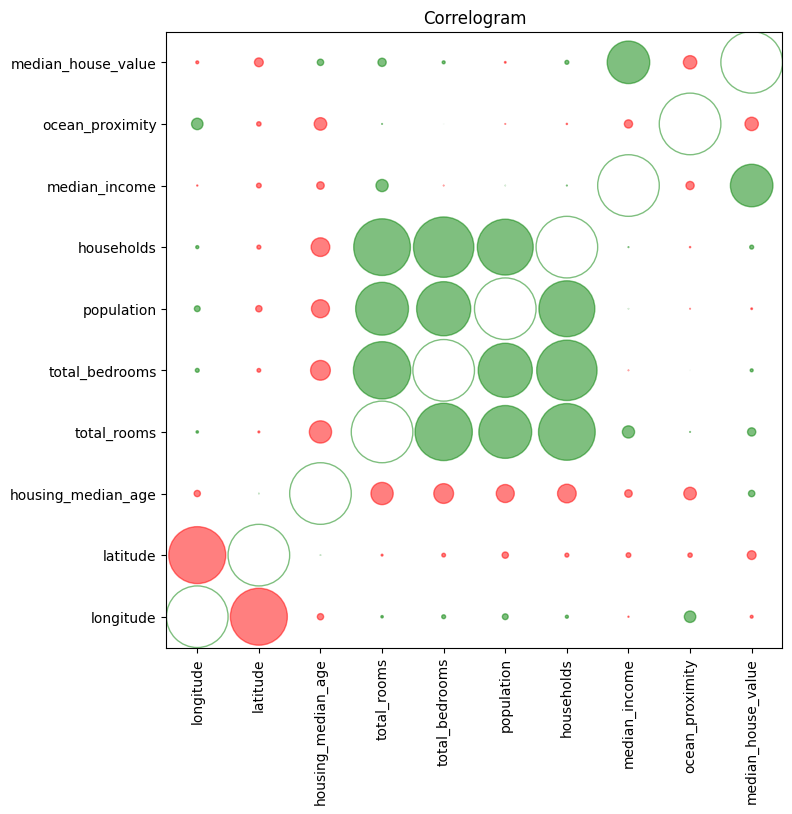

In [0]:
# display correlation matrix visually
 v

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1.0
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1.0
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.0
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1.0
-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,1.0
-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,1.0
-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,1.0
-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,1.0
-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,1.0


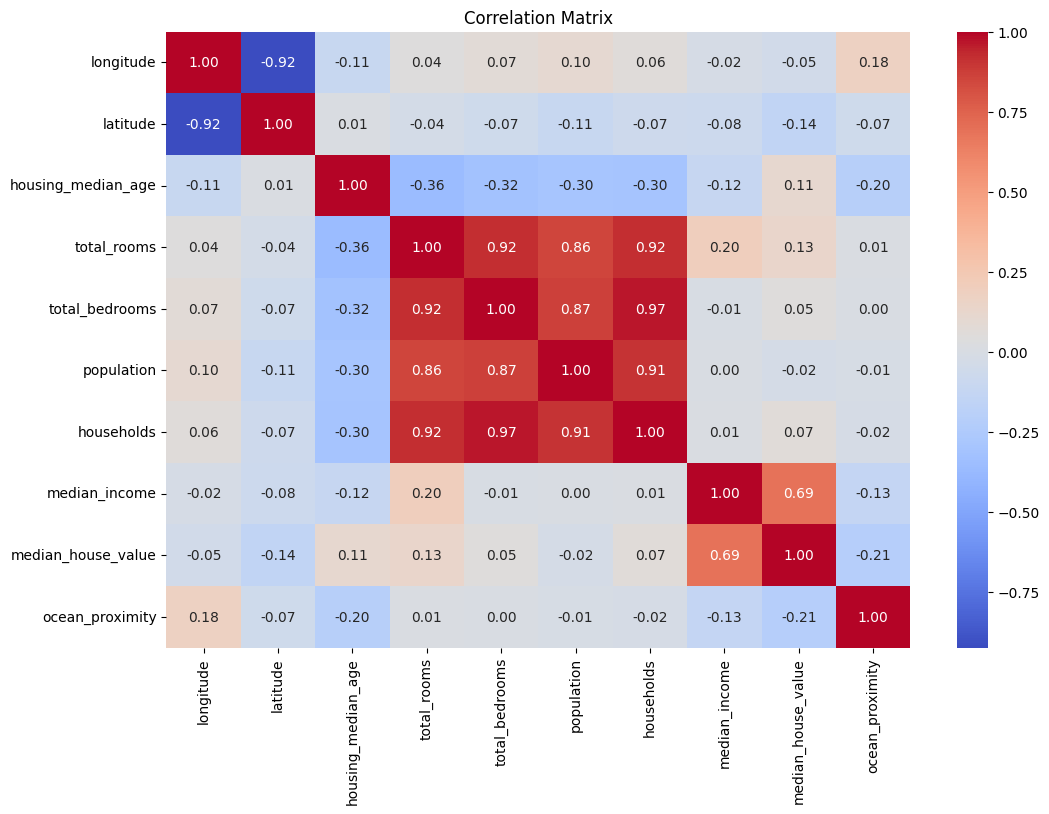

In [0]:
import seaborn as sns

# Display the first 10 rows of the feature_data_pd DataFrame
display(feature_data_pd.head(10))

# Calculate correlation matrix
corr = feature_data_pd.corr()

# Display correlation matrix visually using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Fit a Regression Model

To enhance the performance of our regression model, we'll scale our input variables so that they are on a common (standardized) scale. **Standardization ensures that each feature has a mean of 0 and a standard deviation of 1**, which can be beneficial for certain algorithms, including linear regression.

In [0]:
from math import sqrt

import mlflow.sklearn

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

# turn on autologging
mlflow.sklearn.autolog(log_input_examples=True)

# apply the Standard Scaler to all our input columns
std_ct = ColumnTransformer(transformers=[("scaler", StandardScaler(), ["total_bedrooms", "total_rooms", "housing_median_age", "latitude", "longitude", "median_income", "population", "ocean_proximity", "households"])])

# pipeline to transform inputs and then pass results to the linear regression model
lr_pl = Pipeline(steps=[
  ("tx_inputs", std_ct),
  ("lr", LinearRegression() )
])

# fit our model
lr_mdl = lr_pl.fit(X_train, y_train)

# evaluate the test set
predicted = lr_mdl.predict(X_test)
test_r2 = r2_score(y_test, predicted)
test_mse = mean_squared_error(y_test, predicted)
test_rmse = sqrt(test_mse)
test_mape = mean_absolute_percentage_error(y_test, predicted)
print("Test evaluation summary:")
print(f"R^2: {test_r2}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"MAPE: {test_mape}")

2025/08/07 02:25:47 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'cc790dada82d49b78795b8de70367e81', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Uploading artifacts:   0%|          | 0/11 [00:00<?, ?it/s]

2025/08/07 02:25:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run bedecked-fly-341 at: dbc-8b9f7bce-656b.cloud.databricks.com/ml/experiments/4297320214104364/runs/cc790dada82d49b78795b8de70367e81.
2025/08/07 02:25:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: dbc-8b9f7bce-656b.cloud.databricks.com/ml/experiments/4297320214104364.


Test evaluation summary:
R^2: 0.5999828570818667
MSE: 5241860555.3019495
RMSE: 72400.69443936259
MAPE: 0.3106651062947096


## Examine Model Result

Now, let's inspect the results of our linear regression model. We'll examine both the intercept and the coefficients of the fitted model. Additionally, we'll perform a **t-test on each coefficient to assess its significance in contributing to the overall model**.

In [0]:
lr_mdl

Pipeline(steps=[('tx_inputs',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['total_bedrooms',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'latitude', 'longitude',
                                                   'median_income',
                                                   'population',
                                                   'ocean_proximity',
                                                   'households'])])),
                ('lr', LinearRegression())])

In [0]:
import pandas as pd
import numpy as np
from scipy import stats

# Extracting coefficients and intercept
coefficients = np.append([lr_mdl.named_steps['lr'].intercept_], lr_mdl.named_steps['lr'].coef_)
coefficient_names = ['Intercept'] + X_train.columns.to_list()

# Calculating standard errors and other statistics (this is a simplified example)
# In a real scenario, you might need to calculate these values more rigorously
n_rows, n_cols = X_train.shape
X_with_intercept = np.append(np.ones((n_rows, 1)), X_train, axis=1)
var_b = test_mse * np.linalg.inv(np.dot(X_with_intercept.T, X_with_intercept)).diagonal()
standard_errors = np.sqrt(var_b)
t_values = coefficients / standard_errors
p_values = [2 * (1 - stats.t.cdf(np.abs(i), (len(X_with_intercept) - 1))) for i in t_values]

# Creating a DataFrame for display
summary_df = pd.DataFrame({'Coefficient': coefficients,
                           'Standard Error': standard_errors,
                           't-value': t_values,
                           'p-value': p_values},
                          index=coefficient_names)

# Print the DataFrame
print(summary_df)

                      Coefficient  Standard Error       t-value       p-value
Intercept           207194.693738    75129.568489      2.757832  5.825015e-03
longitude            48172.004060      847.352193     56.850038  0.000000e+00
latitude            -17003.195907      792.735798    -21.448755  0.000000e+00
housing_median_age   14453.123473       50.794291    284.542280  0.000000e+00
total_rooms         -89482.980497        0.931524 -96060.864087  0.000000e+00
total_bedrooms      -83898.158094        8.107968 -10347.618515  0.000000e+00
population           76741.316423        1.249209  61431.918600  0.000000e+00
households          -44011.228718        8.852921  -4971.379623  0.000000e+00
median_income        -2686.738303      394.112477     -6.817187  9.605428e-12
ocean_proximity      17483.745311      713.315553     24.510534  0.000000e+00


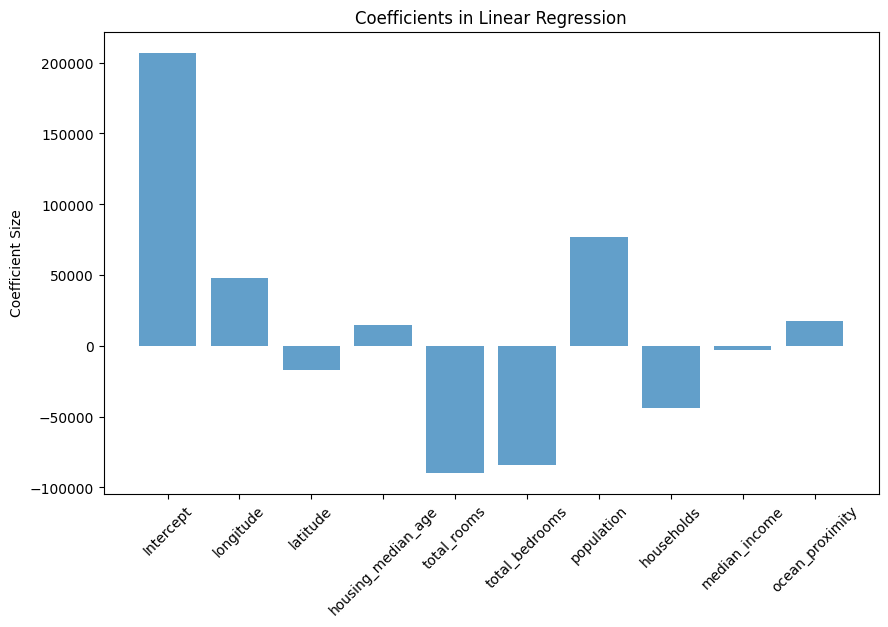

In [0]:
import matplotlib.pyplot as plt

# Plotting the feature importances
plt.figure(figsize=(10, 6))
y_pos = np.arange(len(coefficient_names))
plt.bar(y_pos, coefficients, align='center', alpha=0.7)
plt.xticks(y_pos, coefficient_names, rotation=45)
plt.ylabel('Coefficient Size')
plt.title('Coefficients in Linear Regression')

plt.show()


## Conclusion

In conclusion, this demonstration provided a comprehensive walkthrough of training a linear regression model using the scikit-learn library. We covered essential steps such as data preparation, model fitting, and result examination. Understanding the coefficients and intercept of the model is crucial for interpreting its predictive power. Moreover, we discussed the significance of each feature through t-tests, offering insights into the statistical relevance of predictors. Armed with this knowledge, practitioners can make informed decisions about the importance of variables in their regression models. This demo serves as a foundational guide for those seeking a practical understanding of linear regression modeling in a machine learning context.


&copy; 2025 Databricks, Inc. All rights reserved. Apache, Apache Spark, Spark, the Spark Logo, Apache Iceberg, Iceberg, and the Apache Iceberg logo are trademarks of the <a href="https://www.apache.org/" target="blank">Apache Software Foundation</a>.<br/>
<br/><a href="https://databricks.com/privacy-policy" target="blank">Privacy Policy</a> | 
<a href="https://databricks.com/terms-of-use" target="blank">Terms of Use</a> | 
<a href="https://help.databricks.com/" target="blank">Support</a>